<a href="https://colab.research.google.com/github/SakshamDataWizard/AI_Assistant/blob/main/AI_Assistant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI - ASSISTANT for Learning and recommendations**


In [18]:
!pip install scikit-learn pandas numpy matplotlib seaborn joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import joblib

print("✅ Setup complete.")


✅ Setup complete.


In [2]:
data = pd.DataFrame({
    'hours_studied': [1, 2, 3, 2.5, 5, 8, 7, 6],
    'attendance_pct': [50, 60, 70, 65, 90, 95, 85, 80],
    'passed': [0, 0, 0, 0, 1, 1, 1, 1]
})
data.head()

,hours_studied,attendance_pct,passed
0,1.0,50,0
1,2.0,60,0
2,3.0,70,0
3,2.5,65,0
4,5.0,90,1


In [3]:
X = data[['hours_studied', 'attendance_pct']]
y = data['passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:,1]
print("ROC AUC:", roc_auc_score(y_test, y_prob))


joblib.dump(model, '/content/logreg_passfail.pkl')
print("✅ Model saved: logreg_passfail.pkl")

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

ROC AUC: 1.0
✅ Model saved: logreg_passfail.pkl


In [4]:
score_data = pd.DataFrame({
    'time_per_question_sec': [30, 45, 60, 20, 80, 35, 55, 40],
    'past_score': [50, 60, 55, 70, 80, 65, 75, 68],
    'difficulty': [2, 3, 2, 1, 4, 3, 4, 3],
    'score': [55, 63, 58, 72, 85, 67, 78, 70]
})
score_data.head()

,time_per_question_sec,past_score,difficulty,score
0,30,50,2,55
1,45,60,3,63
2,60,55,2,58
3,20,70,1,72
4,80,80,4,85


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

X = score_data[['time_per_question_sec', 'past_score', 'difficulty']]
y = score_data['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", mean_squared_error(y_test, rf_pred))

print("\n Linear Regression:")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", mean_squared_error(y_test, lr_pred))

joblib.dump(rf, '/content/rf_score_predictor.pkl')
joblib.dump(lr, '/content/lr_score_predictor.pkl')
print("✅ Models saved.")

Random Forest:
MAE: 5.270000000000006
RMSE: 37.962300000000056

 Linear Regression:
MAE: 2.042705480302182
RMSE: 6.989667956233411
✅ Models saved.


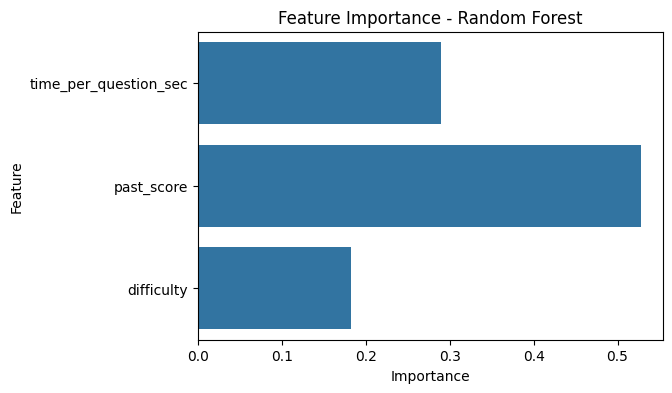

In [7]:
importances = rf.feature_importances_
features = X.columns
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

cluster_data = pd.DataFrame({
    'time_on_topic': [20, 30, 40, 60, 15, 25, 70, 10],
    'avg_score': [60, 65, 70, 85, 55, 62, 90, 50],
    'num_attempts': [3, 2, 4, 1, 5, 3, 1, 6],
    'response_time': [10, 12, 15, 5, 20, 10, 6, 25]
})
cluster_data.head()

,time_on_topic,avg_score,num_attempts,response_time
0,20,60,3,10
1,30,65,2,12
2,40,70,4,15
3,60,85,1,5
4,15,55,5,20


In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

cluster_data['cluster'] = cluster_labels

score = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score: {score:.3f}")
print(cluster_data)

joblib.dump(kmeans, '/content/kmeans_learning_style.pkl')
print("✅ KMeans model saved.")

Silhouette Score: 0.633
   time_on_topic  avg_score  num_attempts  response_time  cluster
0             20         60             3             10        2
1             30         65             2             12        2
2             40         70             4             15        2
3             60         85             1              5        1
4             15         55             5             20        0
5             25         62             3             10        2
6             70         90             1              6        1
7             10         50             6             25        0
✅ KMeans model saved.


In [10]:
!pip install xgboost

import xgboost as xgb

dropout_data = pd.DataFrame({
    'video_watch_count': [10, 20, 5, 0, 30, 25, 2, 3],
    'forum_posts': [1, 2, 0, 0, 4, 3, 0, 0],
    'problem_attempts': [5, 10, 2, 1, 15, 12, 1, 0],
    'last_active_days': [2, 1, 7, 14, 1, 2, 10, 20],
    'dropout_flag': [0, 0, 1, 1, 0, 0, 1, 1]
})
dropout_data.head()

,video_watch_count,forum_posts,problem_attempts,last_active_days,dropout_flag
0,10,1,5,2,0
1,20,2,10,1,0
2,5,0,2,7,1
3,0,0,1,14,1
4,30,4,15,1,0


In [11]:
X = dropout_data.drop('dropout_flag', axis=1)
y = dropout_data['dropout_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save
joblib.dump(model, '/content/xgb_dropout_predictor.pkl')
print("✅ XGBoost dropout model saved.")


Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

✅ XGBoost dropout model saved.


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, validation_split=0.2)

model.save('/content/mnist_cnn.h5')
print("✅ CNN model saved.")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8915 - loss: 0.3747 - val_accuracy: 0.9778 - val_loss: 0.0797
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9803 - loss: 0.0676 - val_accuracy: 0.9816 - val_loss: 0.0629
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9861 - loss: 0.0447 - val_accuracy: 0.9843 - val_loss: 0.0569


✅ CNN model saved.


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input, Bidirectional

texts = [
    "The climate is changing rapidly",
    "Photosynthesis is crucial to plant growth",
    "Newton’s laws describe motion",
    "The French Revolution changed history"
]
labels = [0, 1, 2, 3]  # 4 classes (env, bio, physics, history)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=10)
y = to_categorical(labels)

input_ = Input(shape=(10,))
x = Embedding(input_dim=50, output_dim=8)(input_)
x = Bidirectional(LSTM(16))(x)
x = Dense(4, activation='softmax')(x)

model = Model(input_, x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10)

model.save('/content/bilstm_topic_classifier.h5')
print("✅ BiLSTM model saved.")


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.0000e+00 - loss: 1.3885
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.2500 - loss: 1.3875
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5000 - loss: 1.3866
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.2500 - loss: 1.3857
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2500 - loss: 1.3848
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5000 - loss: 1.3839
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 1.3830
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 1.3821
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 1.3812
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 1.3803


✅ BiLSTM model saved.


In [14]:
!pip install transformers

from transformers import pipeline

summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

text = """
Artificial Intelligence is transforming the educational landscape. It allows personalized learning experiences, automates grading, and provides real-time feedback to students and educators alike.
"""

summary = summarizer(text, max_length=40, min_length=10, do_sample=False)
print("Summary:", summary[0]['summary_text'])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu
Your max_length is set to 40, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)


Summary:  Artificial Intelligence is transforming the educational landscape . It allows personalized learning experiences, automates grading, and provides real-time feedback .


In [19]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_students = 300

df = pd.DataFrame({
    "study_hours": np.clip(np.random.normal(loc=4, scale=2, size=num_students), 0, 10),
    "attendance": np.clip(np.random.normal(loc=80, scale=10, size=num_students), 50, 100),
    "previous_scores": np.clip(np.random.normal(loc=70, scale=15, size=num_students), 0, 100)
})

df["final_score"] = (
    0.4 * df["study_hours"] * 10 +
    0.3 * df["attendance"] +
    0.3 * df["previous_scores"] +
    np.random.normal(0, 5, num_students)
) / 2
df["final_score"] = df["final_score"].clip(0, 100)

df["dropout_risk"] = ((df["attendance"] < 65) | (df["final_score"] < 50)).astype(int)

df.head()


,study_hours,attendance,previous_scores,final_score,dropout_risk
0,4.993428,71.710050,81.354829,33.868272,1
1,3.723471,74.398190,56.167520,26.048452,1
2,5.295377,87.472936,83.044089,36.240170,1
3,7.046060,86.103703,90.334568,43.753990,1
4,3.531693,79.790984,76.201524,30.940010,1


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[["study_hours", "attendance", "previous_scores"]]
y_score = df["final_score"]
y_dropout = df["dropout_risk"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

score_regressor = LinearRegression()
score_regressor.fit(X_scaled, y_score)

dropout_classifier = RandomForestClassifier(random_state=42)
dropout_classifier.fit(X_scaled, y_dropout)

cluster_model = KMeans(n_clusters=3, random_state=42)
cluster_model.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [15]:
!pip install streamlit scikit-learn pandas matplotlib seaborn joblib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [21]:
import joblib

joblib.dump(score_regressor, 'score_regressor.pkl')
joblib.dump(dropout_classifier, 'dropout_classifier.pkl')
joblib.dump(cluster_model, 'student_cluster_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [23]:
%%writefile AI_Assistant_app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

score_model = joblib.load('score_regressor.pkl')
dropout_model = joblib.load('dropout_classifier.pkl')
cluster_model = joblib.load('student_cluster_model.pkl')
scaler = joblib.load('scaler.pkl')

st.set_page_config(page_title="AI Learning Assistant", layout="wide")

st.title("🎓 AI-Powered Personalized Learning Assistant")

with st.form("student_form"):
    st.subheader("Enter Student Details")

    study_hours = st.number_input("Daily Study Hours", min_value=0.0, max_value=24.0, step=0.5)
    attendance = st.slider("Attendance (%)", 0, 100, 75)
    previous_scores = st.number_input("Average Previous Scores (0-100)", min_value=0.0, max_value=100.0)

    submitted = st.form_submit_button("Predict")

if submitted:
    input_data = pd.DataFrame([[study_hours, attendance, previous_scores]],
                              columns=["study_hours", "attendance", "previous_scores"])

    scaled_data = scaler.transform(input_data)

    score_pred = score_model.predict(scaled_data)[0]
    dropout_risk = dropout_model.predict(scaled_data)[0]
    cluster = cluster_model.predict(scaled_data)[0]

    st.markdown(f"### 📊 Predicted Score: **{score_pred:.2f}**")
    st.markdown(f"### ⚠️ Dropout Risk: {'Yes' if dropout_risk else 'No'}")
    st.markdown(f"### 🧠 Learning Style Cluster: **Cluster {cluster}**")

    if cluster == 0:
        st.info("💡 Tip: Visual learner – use diagrams and charts.")
    elif cluster == 1:
        st.info("🎧 Tip: Auditory learner – benefit from lectures or podcasts.")
    else:
        st.info("📝 Tip: Kinesthetic learner – hands-on activities work best.")


Writing AI_Assistant_app.py


In [30]:
!pip install streamlit pandas

In [33]:
! streamlit run AI_Assistant_app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.121.80.249:8501

⠦⠧⠇⠏⠋⠙your url is: https://brave-sloths-design.loca.lt
  Stopping...
^C


In [1]:
    !rm -rf .git